In [ ]:
install.packages('random')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(random)
library(magrittr)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
table_m_q <- function(x) {
    n <- length(x)
    n_groups <- 1 + floor(log2(n))
    h <- (max(x) - min(x))/n_groups
    z <- seq(from=min(x), to=max(x), by=h)
    X <- (z[-1]+z[-length(z)])/2
    table_cut <-data.frame(values=x, groups=cut(x, n_groups))
    table_hist <- table_cut %>% dplyr::group_by(groups) %>% dplyr::summarise(abs_freq = n(), rel_freq=n()/n)
    table_hist$low <- round(z[-length(z)], 1)
    table_hist$upp <- round(z[-1], 1)
    table_hist$med <- round(X, 1)
    m <- sum(table_hist$med * table_hist$rel_freq)
    q <- sqrt(sum((table_hist$med - m)^2 * table_hist$rel_freq))
    return (list(table = table_hist, groups = n_groups, mean = m, sd = q))
}

In [ ]:
anamorph_norm <- function(table_hist, mean) {
  ln_p <- log(table_hist$rel_freq) 
  x <- (table_hist$med- mean)^2 
  linear_model <- lm(ln_p ~ x) 
  a <- linear_model$coefficients[2] 
  b <- linear_model$coefficients[1] 
  mod_ln_p <- a * x + b 
  R2 <- cor(ln_p, mod_ln_p)^2
  plot(x = x, y = ln_p, col = "red", type = "o", pch = 19, lwd = I(1.2), xlab = "X(i)", ylab = "ln(pi)") 
  abline(a = b, b = a, col = "blue", lwd = I(1.2)) 
  grid()
  return (R2)   
}
interg_chi <- function(low=-Inf, high=Inf, df_param=0) {
  unlist(
    integrate(f = dchisq, lower=low, upper=high, df = df_param, abs.tol=0)[1]
  )
}

chisq_test_ <- function(table_hist, dfs) {
  N <- sum(table_hist$abs_freq)
  prac <- table_hist$abs_freq
  theor <- numeric(nrow(table_hist))
  for (i in 1:nrow(table_hist)) {
    theor[i] <- N * (interg_chi(high = table_hist$upp[i], df_param = dfs) - interg_chi(high = table_hist$low[i], df_param = dfs))
  }
  chisq_d <-sum((prac - theor)^2 / theor)
  return(chisq_d)
}

interg_f <- function(low=-Inf, high=Inf, df1_param=0, df2_param=0) {
  unlist(
    integrate(f = df, lower=low, upper=high, df1 = df1_param, df2 = df2_param, abs.tol=0)[1]
  )
}

chisq_test_f <- function(table_hist, dfp1, dfp2) {
  N <- sum(table_hist$abs_freq)
  prac <- table_hist$abs_freq
  theor <- numeric(nrow(table_hist))
  for (i in 1:nrow(table_hist)) {
    theor[i] <- N * (interg_f(high = table_hist$upp[i], df1_param = dfp1, df2_param = dfp2) - interg_f(high = table_hist$low[i], df1_param = dfp1, df2_param = dfp2))
  }
  chisq_d <-sum((prac - theor)^2 / theor)
  return(chisq_d)
}


interg_st <- function(low=-Inf, high=Inf, df_param=0) {
  unlist(
    integrate(f = dt, lower=low, upper=high, df = df_param, abs.tol=0)[1]
  )
}

chisq_test_st <- function(table_hist, dfs) {
  N <- sum(table_hist$abs_freq)
  prac <- table_hist$abs_freq
  theor <- numeric(nrow(table_hist))
  for (i in 1:nrow(table_hist)) {
    B <- 
    theor[i] <- N * (interg_st(high = table_hist$upp[i], df_param = dfs) - interg_st(high = table_hist$low[i], df_param = dfs))
  }
  chisq_d <-sum((prac - theor)^2 / theor)
  return(chisq_d)
}

chi_test_norm <- function(table_hist, mean_p = 0, sd_p = 0) {
    N <- sum(table_hist$abs_freq)
    pract <- table_hist$abs_freq 
    theor <- numeric(nrow(table_hist)) 
    for (i in 1:nrow(table_hist)) {
        theor[i] <- N * (integ_norm(high=table_hist$upp[i], mean_param = mean_p, sd_param = sd_p) - integ_norm(high=table_hist$low[i], mean_param = mean_p, sd_param = sd_p))
    }
    chi <- sum((pract - theor)^2 / theor)

    return (chi)
}
integ_norm <- function(low = -Inf, high = Inf, mean_param = 0, sd_param = 1) {
    unlist (
        integrate(f=dnorm, lower=low, upper=high, mean = mean_param, sd = sd_param, abs.tol = 0)$value
    )
}

## Задание  
Построить выборки с нормальным распределением, распределением Стьюдента и х2. После построения проверить их с помощью критерия согласия Пирсона и метода анаморфоз. 

## Построение нормального распределения

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


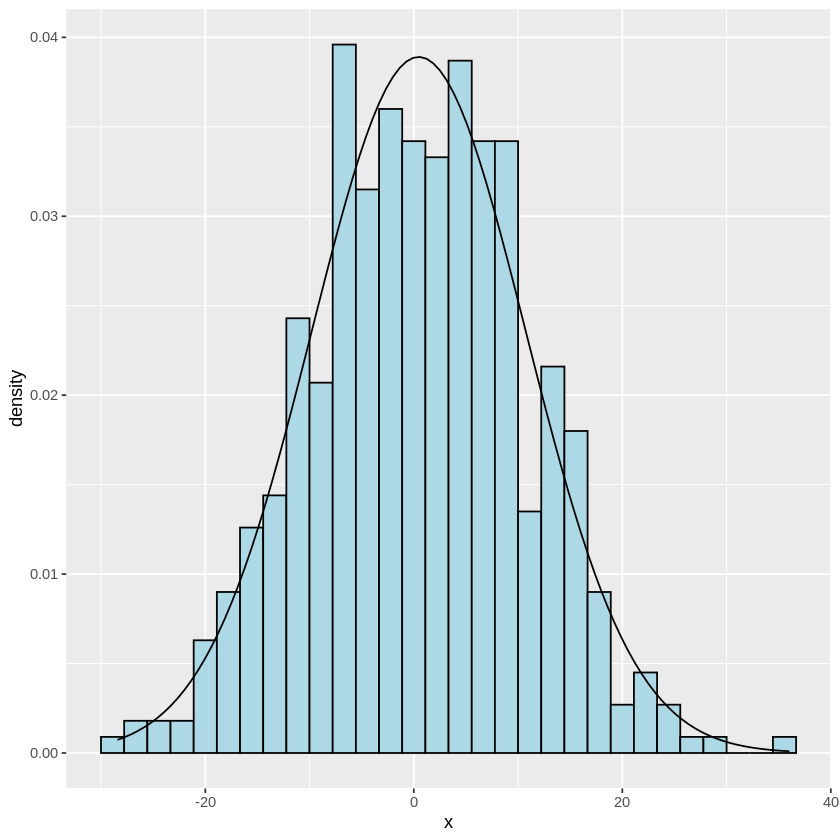

In [ ]:
len = 500

Y <- list()
E <- list(length(100))

for (i in 1:100){
  Y[i] <- list(rnorm(len, 0, 1))
  E <- list(unlist(E) + unlist(Y[i]))
}
E <- unlist(E)
data <- data.frame(x=E)
ggplot(data, aes(x)) +
  geom_histogram(aes(y = ..density..), fill='lightblue', col='black') +
  stat_function(fun = dnorm, args = list(mean=mean(data$x), sd=sd(data$x)))

In [ ]:
table_E <- table_m_q(E)$table
mean_E <- table_m_q(E)$mean 
sd_E <- table_m_q(E)$sd
groups <- table_m_q(E)$groups

[1] 0.9668645

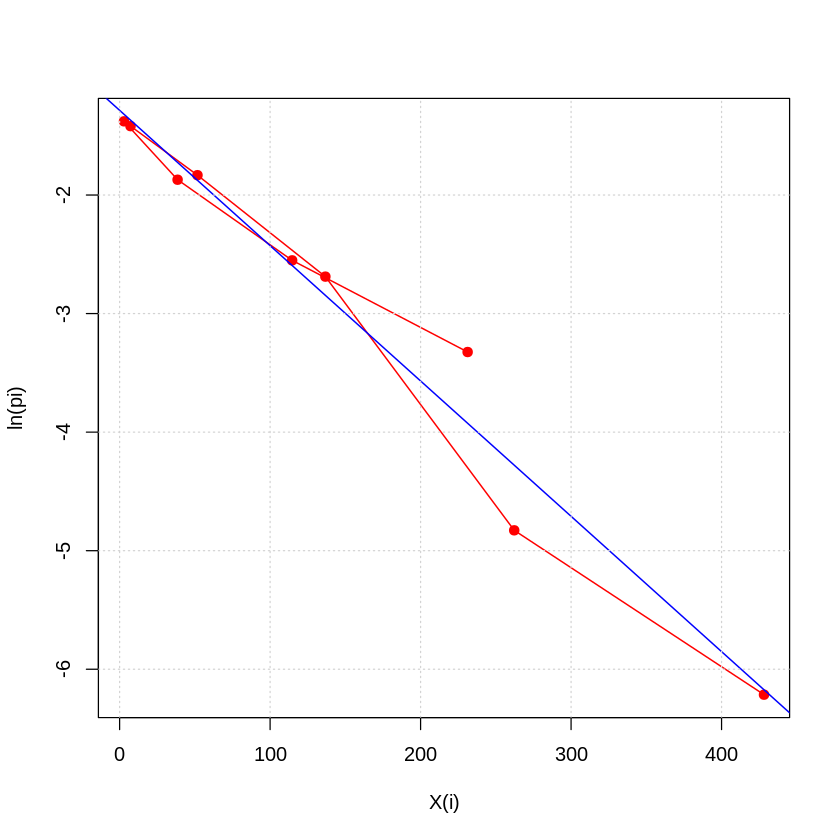

In [ ]:
anamorph_norm(table_E, mean = mean_E)

In [ ]:
c(chi_test_norm(table_hist=table_E, mean_p = mean_E, sd_p = sd_E), qchisq(p=0.975, df=groups - 2 -1))

[1]  4.871937 14.449375

## Построение распределения х2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


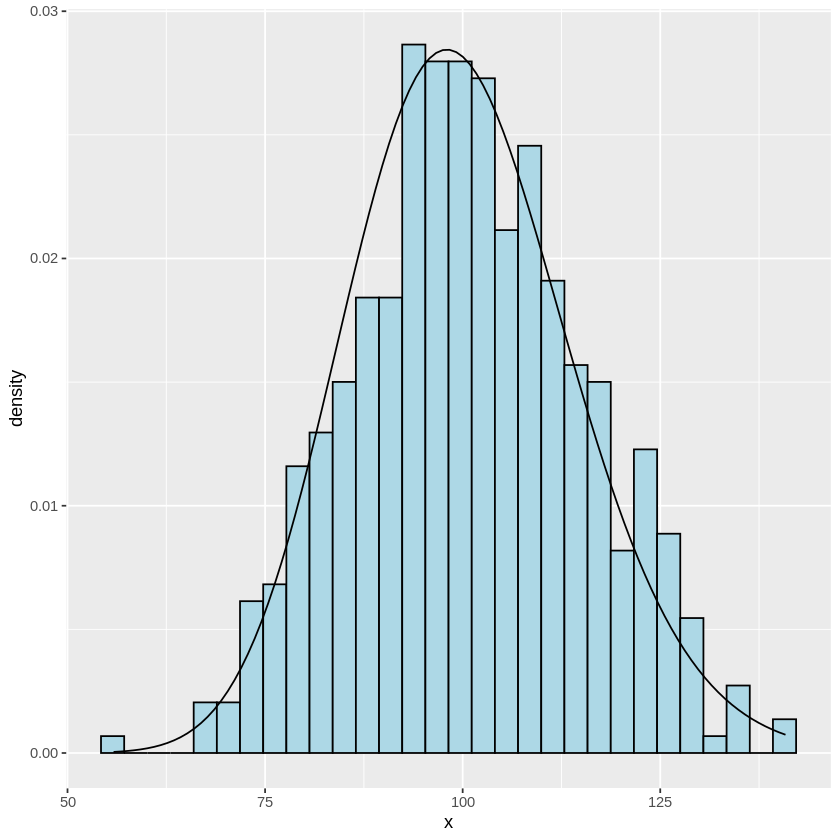

In [ ]:
Z <-list()
R1 <- list(length(100))
for (i in 1:100){
  Z[i] <- list(((unlist(Y[i])-mean(unlist(Y[i])))/sd(unlist(Y[i]))))
  R1 <- list(unlist(R1)+unlist(Z[i])^2)
}
R1 <- unlist(R1)
dataR <- data.frame(x=R1)
ggplot(dataR, aes(x)) +
  geom_histogram(aes(y = ..density..), fill='lightblue', col='black') +
  stat_function(fun = dchisq, args = list(df = 100))

In [ ]:
table_R1 <- table_m_q(R1)$table 
n_groups <- table_m_q(R1)$groups
mean <- table_m_q(R1)$mean
chisq__test <- chisq_test_(table_hist = table_R1, dfs = 100)
c(chisq__test, qchisq(p=0.95, df = 100))

[1]  11.06771 124.34211

## Построение распределения Стьюдента

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


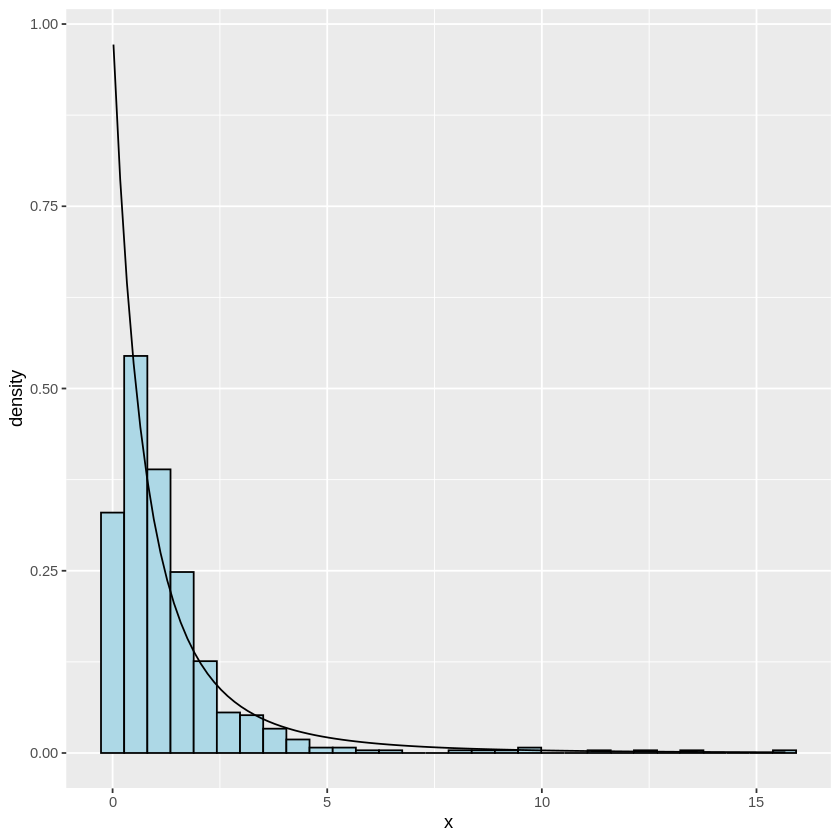

In [ ]:
Y1 <- rchisq(len, 3, ncp=0)
Y2 <- rchisq(len, 6, ncp=0)
S <- (Y1/3)/(Y2/6)
S <- unlist(S)
dataS <- data.frame(x=S)
ggplot(dataS, aes(x)) +
  geom_histogram(aes(y = ..density..), fill='lightblue', col='black') +
  stat_function(fun = df, args = list(df1 = 2, df2 = 5))

In [ ]:
table_S <- table_m_q(S)$table
n_groups <- table_m_q(S)$groups
mean <- table_m_q(S)$mean
chisq__test <- chisq_test_f(table_hist = table_S, dfp1 = 3, dfp2 = 6)
c(chisq__test, qchisq(p=0.95, df = n_groups))

[1] 12.21965 16.91898

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


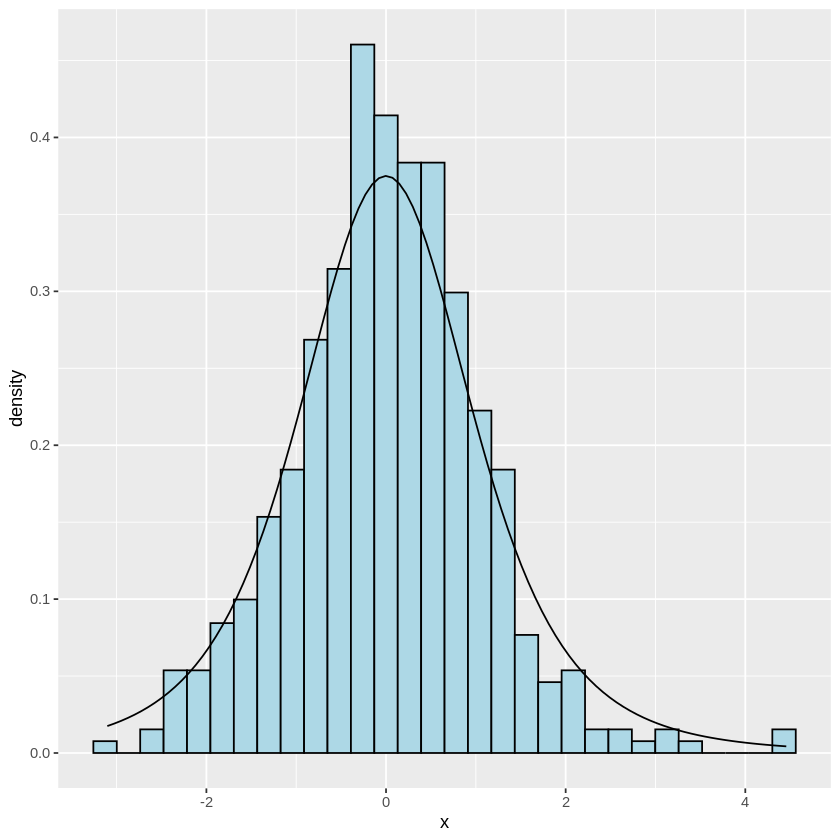

In [ ]:
Y0 <- unlist(rnorm(len,0,1))
y <- list()
Sum_y <- list(length(5))
for (i in 1:5){
  y[i] <- list(rnorm(len, 0, 1))
  Sum_y <- list(unlist(Sum_y) + unlist(y[i])^2)
}
St <- Y0/sqrt((1/5)*unlist(Sum_y))
dataT <- data.frame(x=St)
ggplot(dataT, aes(x)) +
  geom_histogram(aes(y = ..density..), fill='lightblue', col='black') +
  stat_function(fun = dt, args = list(df = 4))

In [ ]:
table_hist <- table_m_q(St)$table 
groups <- table_m_q(St)$groups
mean <- table_m_q(St)$mean
chisq__test <- chisq_test_st(table_hist = table_hist, dfs = 5)
c(chisq__test, qchisq(p=0.95, df = groups))

[1] 12.01765 16.91898